In [2]:
pip install git+https://github.com/mimoralea/gym-walk#egg=gym-walk

  Cloning https://github.com/mimoralea/gym-walk to /tmp/pip-install-eyqlo8eh/gym-walk_be4ac7300413483d9ae0be1334273884
  Running command git clone --filter=blob:none --quiet https://github.com/mimoralea/gym-walk /tmp/pip-install-eyqlo8eh/gym-walk_be4ac7300413483d9ae0be1334273884
  Resolved https://github.com/mimoralea/gym-walk to commit 5999016267d6de2f5a63307fb00dfd63de319ac1
  Preparing metadata (setup.py) ... done
  Created wheel for gym-walk: filename=gym_walk-0.0.2-py3-none-any.whl size=4054 sha256=ff8fe7ad177186c5515f36ab6ddaef614393f472809a5e36d9e489b632f0cdd2
  Stored in directory: /tmp/pip-ephem-wheel-cache-007uxc26/wheels/24/fe/c4/0cbc7511d29265bad7e28a09311db3f87f0cafba74af54d530
Successfully built gym-walk


In [3]:
import warnings ; warnings.filterwarnings('ignore')

import gym, gym_walk
import numpy as np

import random
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)
np.set_printoptions(suppress=True)
random.seed(123); np.random.seed(123)

# Reference https://github.com/mimoralea/gym-walk

In [4]:
def print_policy(pi, P, action_symbols=('<', 'v', '>', '^'), n_cols=4, title='Policy:'):
    print(title)
    arrs = {k:v for k,v in enumerate(action_symbols)}
    for s in range(len(P)):
        a = pi(s)
        print("| ", end="")
        if np.all([done for action in P[s].values() for _, _, _, done in action]):
            print("".rjust(9), end=" ")
        else:
            print(str(s).zfill(2), arrs[a].rjust(6), end=" ")
        if (s + 1) % n_cols == 0: print("|")

In [5]:
def print_state_value_function(V, P, n_cols=4, prec=3, title='State-value function:'):
    print(title)
    for s in range(len(P)):
        v = V[s]
        print("| ", end="")
        if np.all([done for action in P[s].values() for _, _, _, done in action]):
            print("".rjust(9), end=" ")
        else:
            print(str(s).zfill(2), '{}'.format(np.round(v, prec)).rjust(6), end=" ")
        if (s + 1) % n_cols == 0: print("|")

In [6]:
def probability_success(env, pi, goal_state, n_episodes=100, max_steps=200):
    random.seed(123); np.random.seed(123) ; env.seed(123)
    results = []
    for _ in range(n_episodes):
        state, done, steps = env.reset(), False, 0
        while not done and steps < max_steps:
            state, _, done, h = env.step(pi(state))
            steps += 1
        results.append(state == goal_state)
    return np.sum(results)/len(results)

In [7]:
def mean_return(env, pi, n_episodes=100, max_steps=200):
    random.seed(123); np.random.seed(123) ; env.seed(123)
    results = []
    for _ in range(n_episodes):
        state, done, steps = env.reset(), False, 0
        results.append(0.0)
        while not done and steps < max_steps:
            state, reward, done, _ = env.step(pi(state))
            results[-1] += reward
            steps += 1
    return np.mean(results)

In [8]:
env = gym.make('SlipperyWalkFive-v0')
P = env.env.P
init_state = env.reset()
goal_state = 6
LEFT, RIGHT = range(2)

In [9]:
P

{0: {0: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 0, 0.0, True),
   (0.16666666666666666, 0, 0.0, True)],
  1: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 0, 0.0, True),
   (0.16666666666666666, 0, 0.0, True)]},
 1: {0: [(0.5000000000000001, 0, 0.0, True),
   (0.3333333333333333, 1, 0.0, False),
   (0.16666666666666666, 2, 0.0, False)],
  1: [(0.5000000000000001, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.16666666666666666, 0, 0.0, True)]},
 2: {0: [(0.5000000000000001, 1, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.16666666666666666, 3, 0.0, False)],
  1: [(0.5000000000000001, 3, 0.0, False),
   (0.3333333333333333, 2, 0.0, False),
   (0.16666666666666666, 1, 0.0, False)]},
 3: {0: [(0.5000000000000001, 2, 0.0, False),
   (0.3333333333333333, 3, 0.0, False),
   (0.16666666666666666, 4, 0.0, False)],
  1: [(0.5000000000000001, 4, 0.0, False),
   (0.3333333333333333, 3, 0.0, False),
   (0.16666666666666666, 2, 0.0, Fa

In [10]:
init_state

3

In [11]:
state, reward, done, info = env.step(RIGHT)
print("state:{0} - reward:{1} - done:{2} - info:{3}".format(state, reward, done, info))

state:2 - reward:0.0 - done:False - info:{'prob': 0.16666666666666666}


In [12]:
# First Policy
pi_1 = lambda s: {
    0:LEFT, 1:LEFT, 2:LEFT, 3:LEFT, 4:LEFT, 5:LEFT, 6:LEFT
}[s]
print_policy(pi_1, P, action_symbols=('<', '>'), n_cols=7)

Policy:
|           | 01      < | 02      < | 03      < | 04      < | 05      < |           |


In [13]:
# Find the probability of success and the mean return of the first policy
print('Reaches goal {:.2f}%. Obtains an average undiscounted return of {:.4f}.'.format(
    probability_success(env, pi_1, goal_state=goal_state)*100,
    mean_return(env, pi_1)))

Reaches goal 3.00%. Obtains an average undiscounted return of 0.0300.


In [14]:
# Create your own policy
pi_2 = lambda s: {
    0:LEFT, 1:RIGHT, 2:LEFT, 3:RIGHT, 4:LEFT, 5:LEFT, 6:RIGHT
}[s]

# Write your code here

print_policy(pi_2, P, action_symbols=('<', '>'), n_cols=7)

Policy:
|           | 01      > | 02      < | 03      > | 04      < | 05      < |           |


In [15]:
# Find the probability of success and the mean return of you your policy
print('Reaches goal {:.2f}%. Obtains an average undiscounted return of {:.4f}.'.format(
    probability_success(env, pi_2, goal_state=goal_state)*100,
    mean_return(env, pi_2)))

Reaches goal 30.00%. Obtains an average undiscounted return of 0.3000.


In [16]:
def policy_evaluation(pi, P, gamma=1.0, theta=1e-10):
    prev_V = np.zeros(len(P), dtype=np.float64)
    while True:
      V=np.zeros(len(P), dtype=np.float64)
      for s in range(len(P)):
        for prob, next_state, reward, done in P[s][pi(s)]:
          V[s] += prob * (reward + gamma *  prev_V[next_state] * (not done))
      if np.max(np.abs(prev_V - V)) < theta:
        break
      prev_V = V.copy()
    return V

In [17]:
# Code to evaluate the first policy
V1 = policy_evaluation(pi_1, P)
print_state_value_function(V1, P, n_cols=7, prec=5)

State-value function:
|           | 01 0.00275 | 02 0.01099 | 03 0.03571 | 04 0.10989 | 05 0.33242 |           |


In [18]:
# Code to evaluate the second policy
V2 = policy_evaluation(pi_2, P)
print_state_value_function(V2, P, n_cols=7, prec=5)

State-value function:
|           | 01   0.15 | 02    0.2 | 03   0.35 | 04    0.4 | 05   0.55 |           |


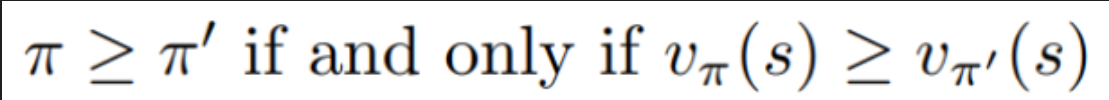

In [19]:
V1


array([0.        , 0.00274725, 0.01098901, 0.03571429, 0.10989011,
       0.33241758, 0.        ])

In [20]:
print_state_value_function(V1, P, n_cols=7, prec=5)


State-value function:
|           | 01 0.00275 | 02 0.01099 | 03 0.03571 | 04 0.10989 | 05 0.33242 |           |


In [21]:
V2


array([0.  , 0.15, 0.2 , 0.35, 0.4 , 0.55, 0.  ])

In [22]:
print_state_value_function(V2, P, n_cols=7, prec=5)


State-value function:
|           | 01   0.15 | 02    0.2 | 03   0.35 | 04    0.4 | 05   0.55 |           |


In [23]:
V1>=V2

array([ True, False, False, False, False, False,  True])

In [24]:

if(np.sum(V1>=V2)==7):
  print("The first policy is the better policy")
elif(np.sum(V2>=V1)==7):
  print("The second policy is the better policy")
else:
  print("Both policies have their merits.")

The second policy is the better policy
